In [1]:
# Install pytrends library (only once in Colab)
!pip install pytrends

# Import libraries
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=330)  # tz=330 is IST timezone

# Choose topics/keywords (you can modify these)
keywords = ["Artificial Intelligence", "Electric Vehicles", "Climate Change", "Data Analytics"]

# Build the request payload
pytrends.build_payload(kw_list=keywords, timeframe='2019-01-01 2025-01-01', geo='IN')
# geo='IN' for India. Use geo='' for Worldwide.


In [3]:
# Fetch interest over time data
df = pytrends.interest_over_time()

# Display first few rows
print(df.head())

# Save dataset as CSV for later use
df.to_csv("google_trends_interest.csv", index=True)


            Artificial Intelligence  Electric Vehicles  Climate Change  \
date                                                                     
2019-01-01                        6                  1               2   
2019-02-01                        6                  1               2   
2019-03-01                        5                  1               2   
2019-04-01                        5                  1               2   
2019-05-01                        6                  1               2   

            Data Analytics  isPartial  
date                                   
2019-01-01               3      False  
2019-02-01               3      False  
2019-03-01               3      False  
2019-04-01               3      False  
2019-05-01               3      False  


In [4]:
from google.colab import files
files.download("google_trends_interest.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Fetch search interest by region (state/country level)
region_df = pytrends.interest_by_region(resolution='country', inc_low_vol=True, inc_geo_code=False)

# Display first rows
print(region_df.head())

# Save to CSV
region_df.to_csv("google_trends_region.csv")


                             Artificial Intelligence  Electric Vehicles  \
geoName                                                                   
Andaman and Nicobar Islands                       35                  6   
Andhra Pradesh                                    49                  7   
Arunachal Pradesh                                 24                  3   
Assam                                             30                  4   
Bihar                                             37                  4   

                             Climate Change  Data Analytics  
geoName                                                      
Andaman and Nicobar Islands              51               8  
Andhra Pradesh                           21              23  
Arunachal Pradesh                        71               2  
Assam                                    59               7  
Bihar                                    46              13  


In [6]:
# Fetch related queries
related_queries = pytrends.related_queries()

# Example: Top related queries for "Artificial Intelligence"
ai_related = related_queries["Artificial Intelligence"]["top"]
print(ai_related.head())

# Save related queries
ai_related.to_csv("google_trends_ai_related.csv")


                             query  value
0       ai artificial intelligence    100
1                               ai     98
2  what is artificial intelligence     77
3   artificial intelligence course     48
4                 machine learning     45


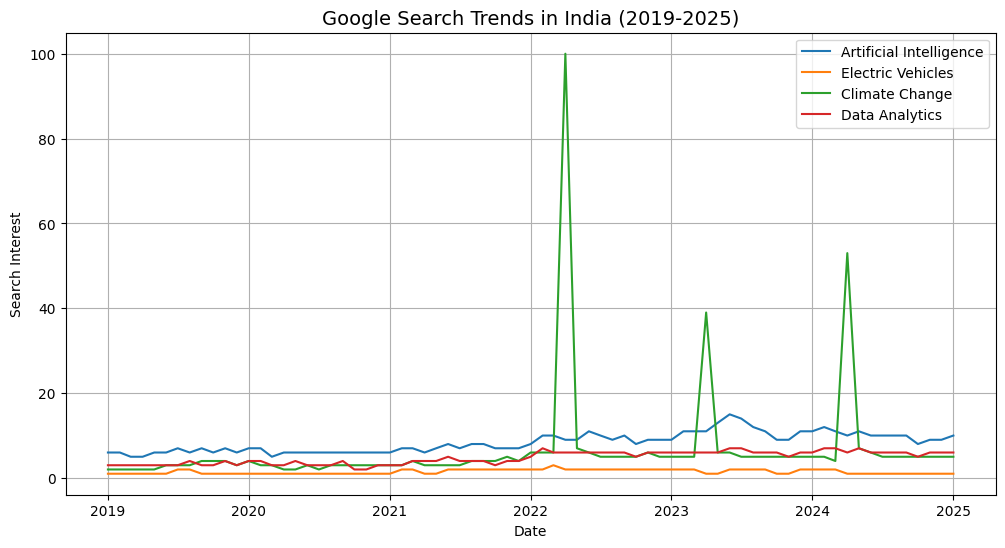

In [7]:
# Load the dataset (if you restart the notebook, reload)
df = pd.read_csv("google_trends_interest.csv", parse_dates=['date'], index_col='date')

# 📊 Plot Search Trends Over Time
plt.figure(figsize=(12,6))
for col in df.drop(columns=['isPartial']).columns:
    plt.plot(df.index, df[col], label=col)

plt.title("Google Search Trends in India (2019-2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.show()


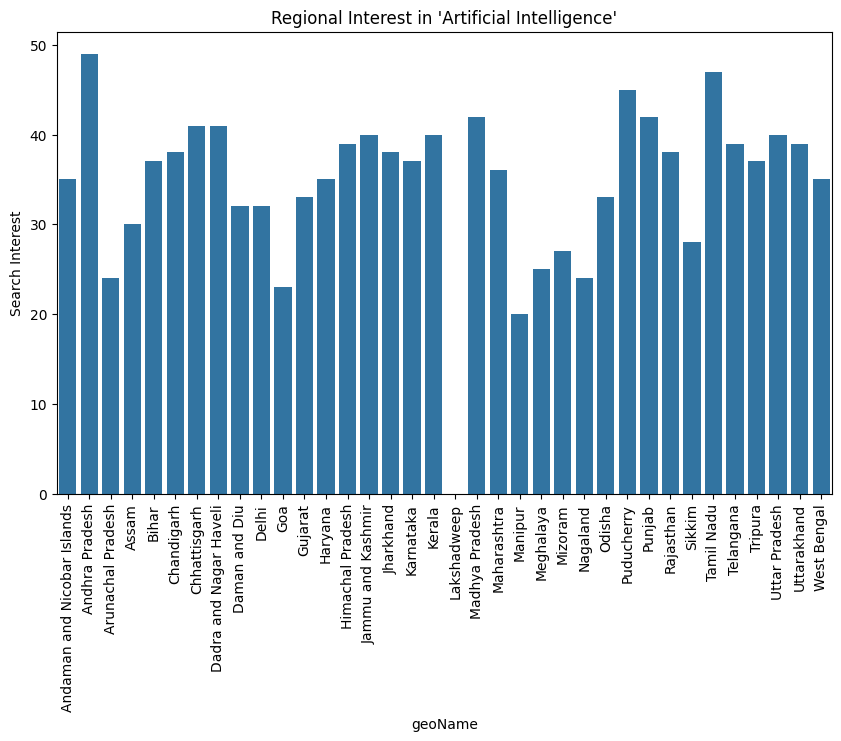

In [8]:
# 📊 Regional Interest Heatmap
region_df = pd.read_csv("google_trends_region.csv", index_col=0)

plt.figure(figsize=(10,6))
sns.barplot(x=region_df.index, y=region_df["Artificial Intelligence"])
plt.xticks(rotation=90)
plt.title("Regional Interest in 'Artificial Intelligence'")
plt.ylabel("Search Interest")
plt.show()


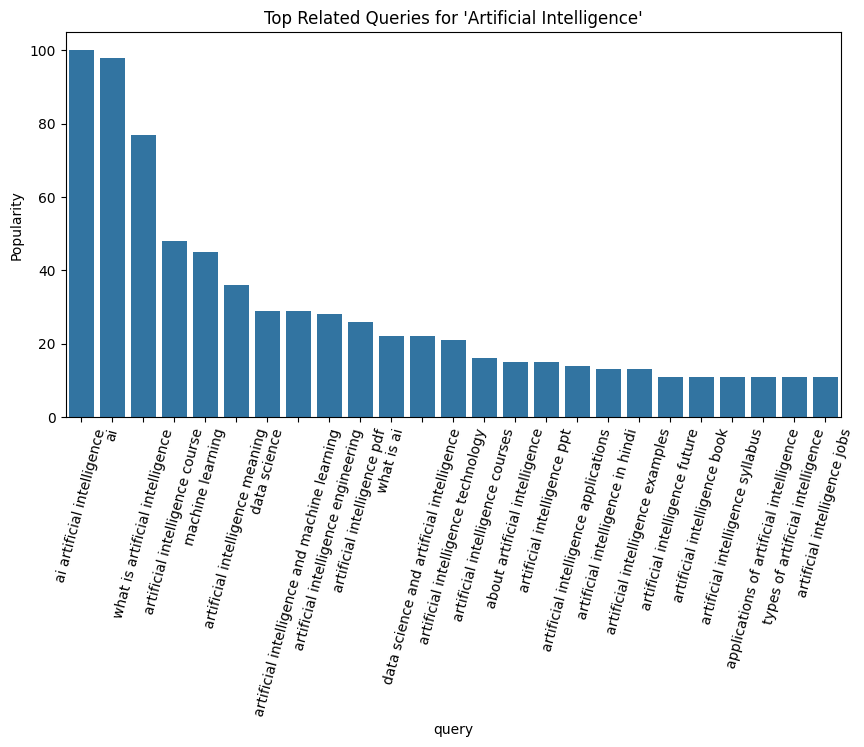

In [9]:
# 📊 Related Queries for 'Artificial Intelligence'
ai_related = pd.read_csv("google_trends_ai_related.csv", index_col=0)

plt.figure(figsize=(10,5))
sns.barplot(x=ai_related["query"], y=ai_related["value"])
plt.xticks(rotation=75)
plt.title("Top Related Queries for 'Artificial Intelligence'")
plt.ylabel("Popularity")
plt.show()


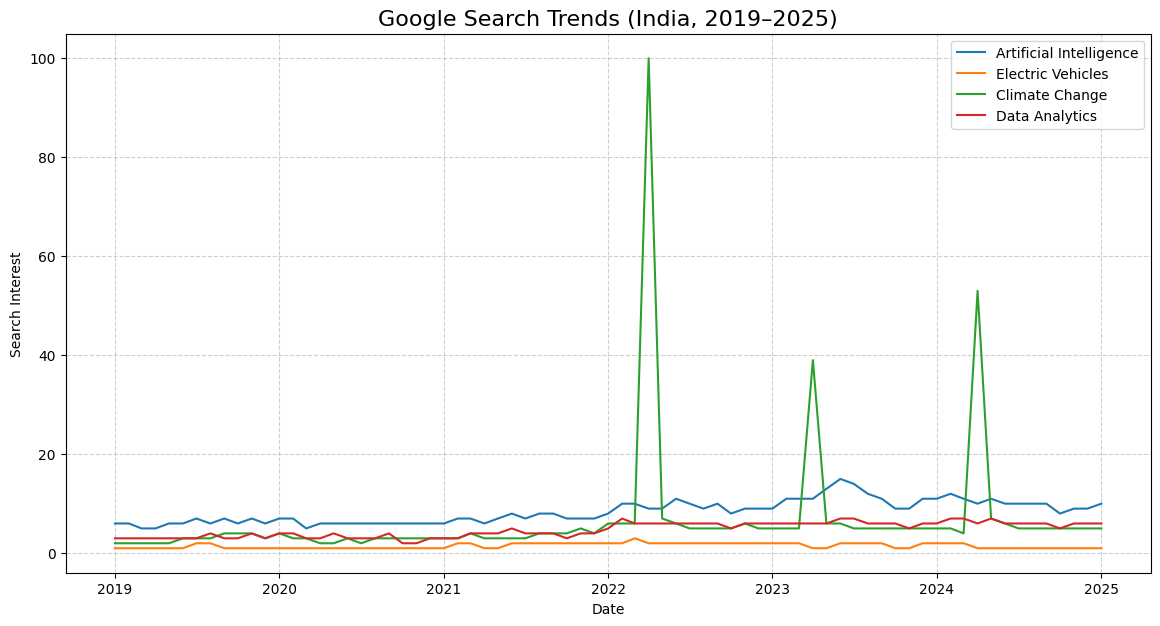

In [10]:
# Reload dataset
df = pd.read_csv("google_trends_interest.csv", parse_dates=['date'], index_col='date')

# 📊 Line Chart of All Keywords
plt.figure(figsize=(14,7))
for col in df.drop(columns=['isPartial']).columns:
    plt.plot(df.index, df[col], label=col)

plt.title("Google Search Trends (India, 2019–2025)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


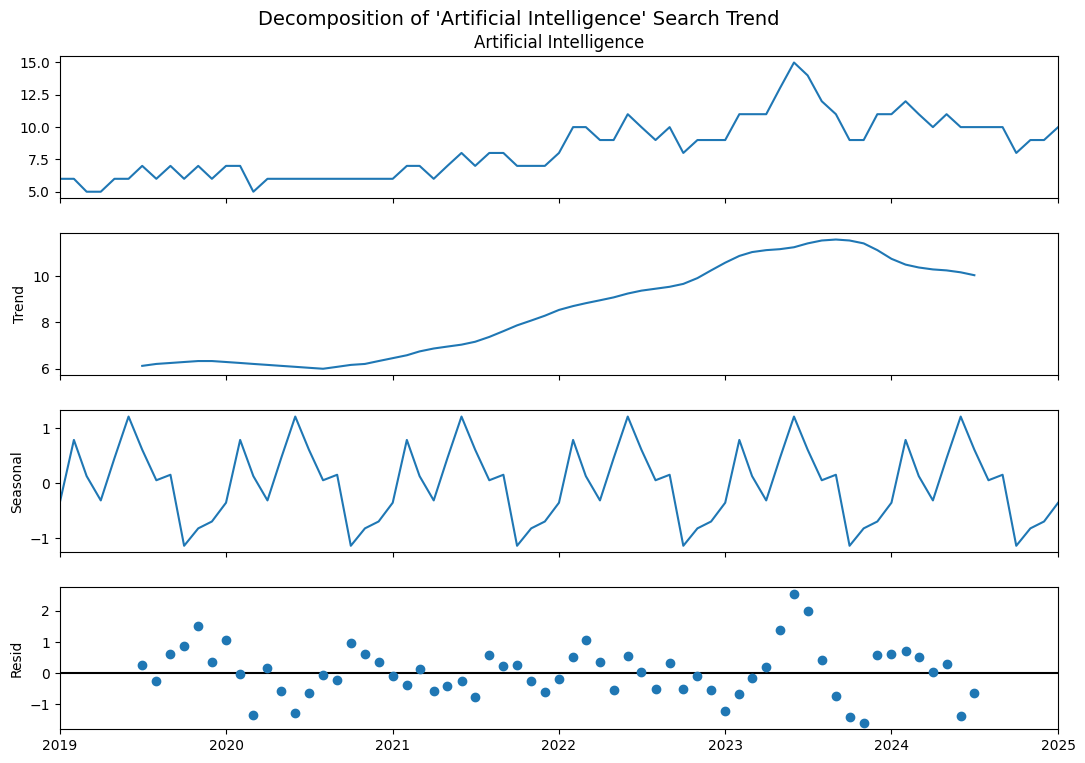

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose AI trends
result = seasonal_decompose(df["Artificial Intelligence"], model='additive', period=12)

fig = result.plot()
fig.set_size_inches(12,8)
plt.suptitle("Decomposition of 'Artificial Intelligence' Search Trend", fontsize=14)
plt.show()

/tmp/ipython-input-2458589754.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample("Y").mean()


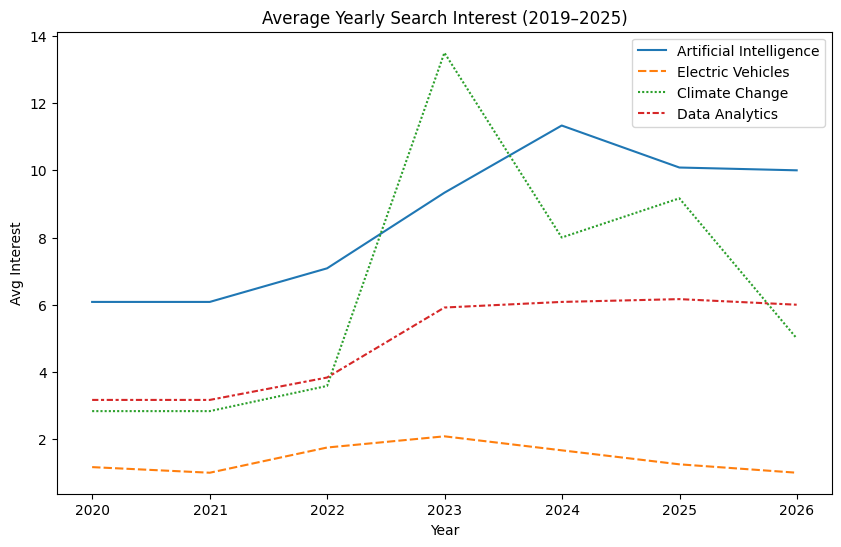

In [13]:
# Resample yearly
yearly = df.resample("Y").mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly.drop(columns=['isPartial']))
plt.title("Average Yearly Search Interest (2019–2025)")
plt.xlabel("Year")
plt.ylabel("Avg Interest")
plt.show()


Top 5 peaks in AI searches:
 date
2023-06-01    15
2023-07-01    14
2023-05-01    13
2023-08-01    12
2024-02-01    12
Name: Artificial Intelligence, dtype: int64


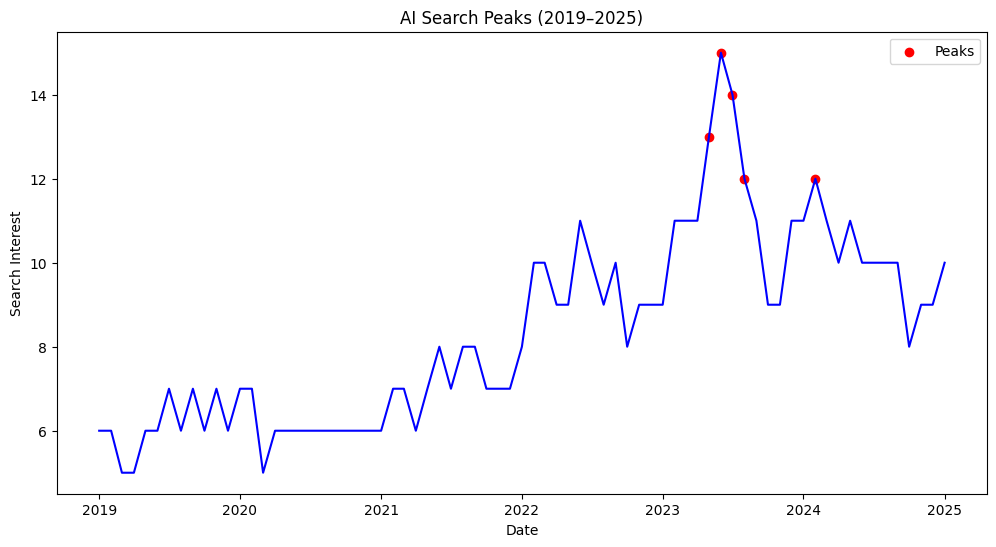

In [14]:
# Find top 5 peaks in 'Artificial Intelligence'
ai_peaks = df["Artificial Intelligence"].sort_values(ascending=False).head(5)
print("Top 5 peaks in AI searches:\n", ai_peaks)

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Artificial Intelligence"], color="blue")
plt.scatter(ai_peaks.index, ai_peaks.values, color="red", label="Peaks")
plt.title("AI Search Peaks (2019–2025)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.show()


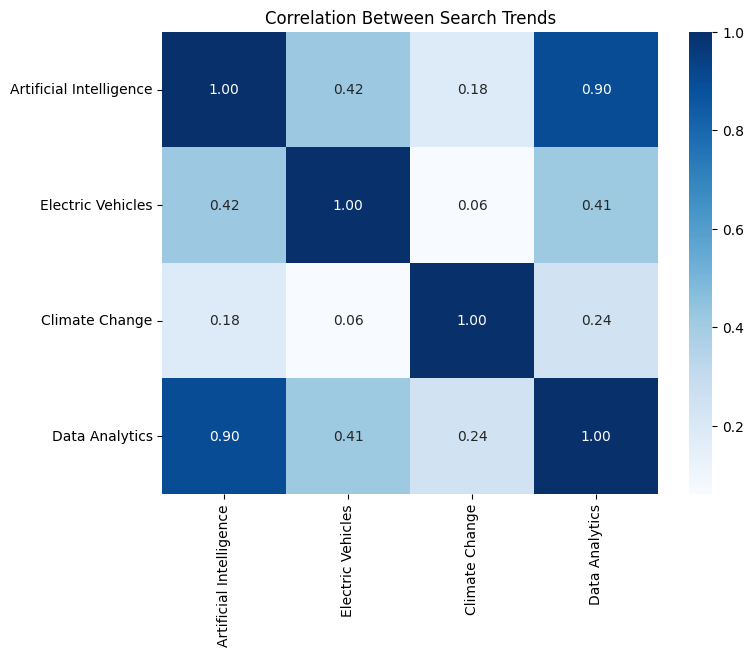

In [15]:
# Correlation heatmap
corr = df.drop(columns=['isPartial']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Search Trends")
plt.show()


/tmp/ipython-input-555850410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ai.values, y=top_ai.index, palette="viridis")


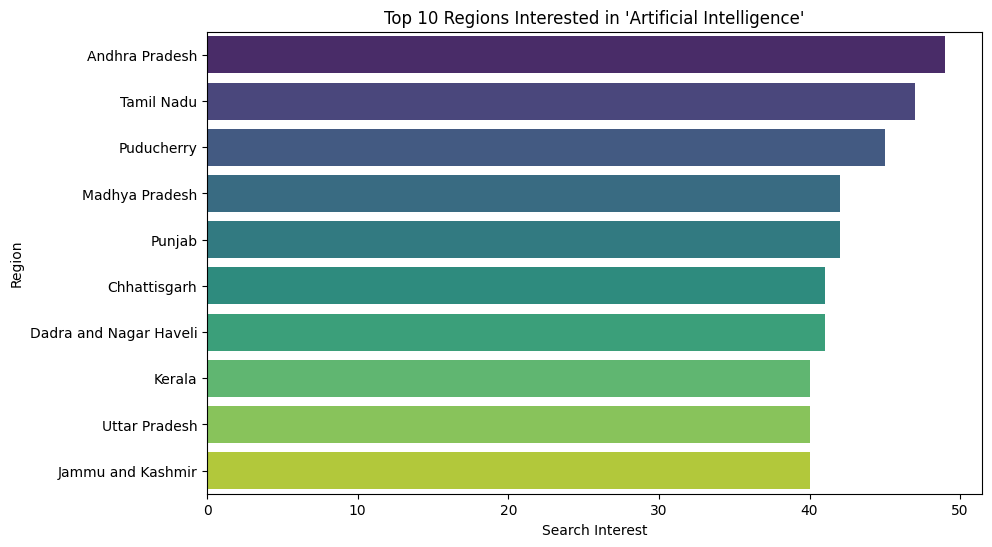

In [16]:
region_df = pd.read_csv("google_trends_region.csv", index_col=0)

# Top 10 regions for AI
top_ai = region_df["Artificial Intelligence"].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_ai.values, y=top_ai.index, palette="viridis")
plt.title("Top 10 Regions Interested in 'Artificial Intelligence'")
plt.xlabel("Search Interest")
plt.ylabel("Region")
plt.show()


/tmp/ipython-input-2662965623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ai_related["value"], y=ai_related["query"], palette="magma")


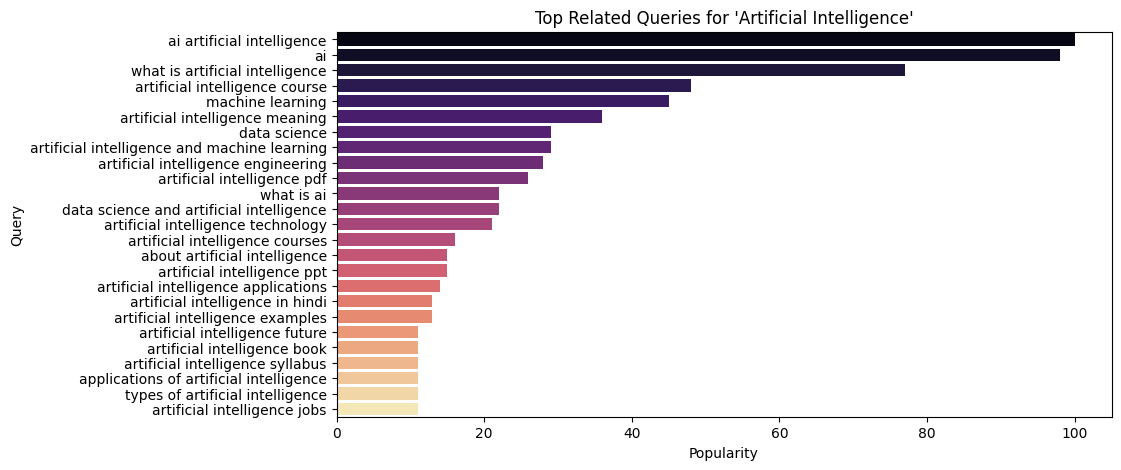

In [17]:
ai_related = pd.read_csv("google_trends_ai_related.csv", index_col=0)

plt.figure(figsize=(10,5))
sns.barplot(x=ai_related["value"], y=ai_related["query"], palette="magma")
plt.title("Top Related Queries for 'Artificial Intelligence'")
plt.xlabel("Popularity")
plt.ylabel("Query")
plt.show()


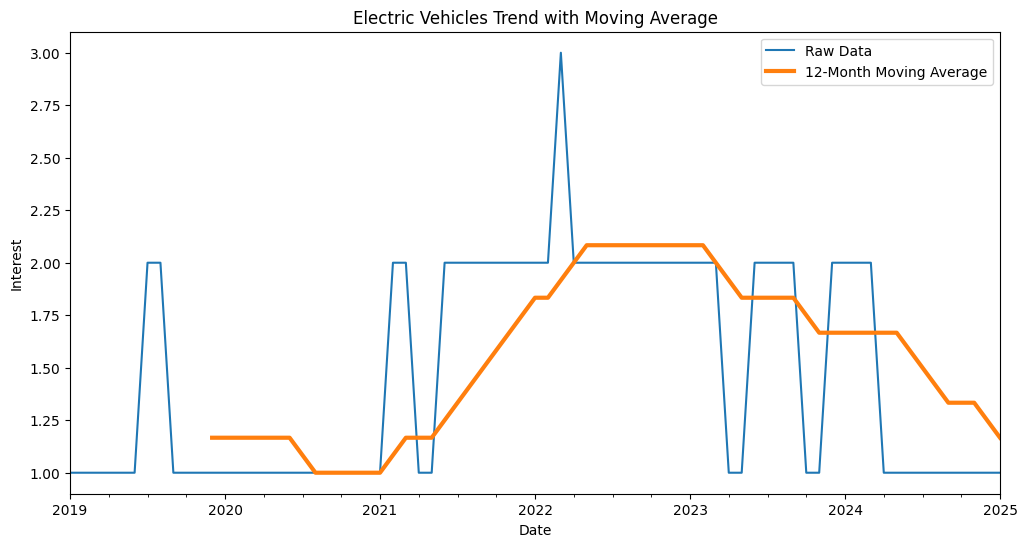

In [18]:
plt.figure(figsize=(12,6))
df["Electric Vehicles"].plot(label="Raw Data")
df["Electric Vehicles"].rolling(window=12).mean().plot(label="12-Month Moving Average", linewidth=3)
plt.title("Electric Vehicles Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.show()
